<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Image Datasets and Transforms</h1> 


<h2>Table of Contents</h2>
<p>In this lab, you will build a dataset objects for images; many of the processes can be applied to a larger dataset. Then you will apply pre-build transforms from Torchvision Transforms to that dataset.</p>
<ul>
    <li><a href="#auxiliary"> Auxiliary Functions </a></li>
    <li><a href="#Dataset"> Datasets</a></li>
    <li><a href="#Torchvision">Torchvision Transforms</a></li>
</ul>

<hr>

<h2>Preparation</h2>


Download the dataset and unzip the files in your data directory, **to download faster this dataset has only 100 samples**:


In [1]:
! wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/labs/Week1/data/img.tar.gz -P /resources/data


--2024-07-18 21:10:36--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/labs/Week1/data/img.tar.gz
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50460 (49K) [application/x-tar]
Saving to: ‘/resources/data/img.tar.gz’

img.tar.gz          100%[===================>]  49.28K  --.-KB/s    in 0.001s  

2024-07-18 21:10:37 (62.0 MB/s) - ‘/resources/data/img.tar.gz’ saved [50460/50460]



In [2]:
!tar -xf /resources/data/img.tar.gz 

In [3]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/labs/Week1/data/index.csv 

--2024-07-18 21:10:54--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/labs/Week1/data/index.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1680905 (1.6M) [text/csv]
Saving to: ‘index.csv’

index.csv           100%[===================>]   1.60M  --.-KB/s    in 0.04s   

2024-07-18 21:10:54 (41.8 MB/s) - ‘index.csv’ saved [1680905/1680905]



We will use this function in the lab:


In [4]:
def show_data(data_sample, shape = (28, 28)):
    plt.imshow(data_sample[0].numpy().reshape(shape), cmap = 'gray')
    plt.title('y = ' + data_sample[1])

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
from matplotlib.pyplot import imshow

from PIL import Image
import os

import torch 
from torch.utils.data import Dataset, DataLoader

torch.manual_seed(0)

<h2 id="auxiliary">Auxiliary Functions</h2>


You will use the following function as components of a dataset object, in this section, you will review each of the components independently.


 The path to the csv file with the labels for each image.


In [6]:
# Read CSV file from the URL and print out the first five samples
directory = ''
csv_file ='index.csv'
csv_path = os.path.join(directory, csv_file)

You can load the CSV file and convert it into a dataframe , using the Pandas function <code>read_csv()</code> . You can view the dataframe using the method head.


In [7]:
data_name = pd.read_csv(csv_path)
data_name.head()

,category,image
0,Ankle boot,img/fashion0.png
1,T-shirt,img/fashion1.png
2,T-shirt,img/fashion2.png
3,Dress,img/fashion3.png
4,T-shirt,img/fashion4.png


The first column of the dataframe corresponds to the type of clothing. The second column is the name of the image file corresponding to the clothing. You can obtain the path of the first file by using the method  <code><i>DATAFRAME</i>.iloc[0, 1]</code>. The first argument corresponds to the sample number, and the second input corresponds to the column index. 


In [8]:
# Get the value on location row 0, column 1
print('File name:', data_name.iloc[0, 1])

File name: img/fashion0.png


As the class of the sample is in the first column, you can also obtain the class value as follows.


In [9]:
# Get the value on location row 0, column 0 

print('y:', data_name.iloc[0, 0])

y: Ankle boot


In [10]:
# Print out the file name and the class number of the element on 2nd row)

print('File name:', data_name.iloc[1, 1])
print('class or y:', data_name.iloc[1, 0])

File name: img/fashion1.png
class or y: T-shirt


The number of samples corresponds to the number of rows in a dataframe. You can obtain the number of rows using the following lines of code. This will correspond the data attribute <code>len</code>.


In [11]:
# Print out tot number of rows in traing dataset --- attribute len

print('Total number of rows: ', data_name.shape[0])

Total number of rows:  60000


<h2 id="load_image">Load Image</h2>


To load the image, you need the directory and the image name. You can concatenate the variable <code>train_data_dir</code> with the name of the image stored in a Dataframe. Finally, you will store the result in the variable <code>image_name</code>


In [12]:
# Combine the directory path with file name

image_name = data_name.iloc[1, 1]
image_name

'img/fashion1.png'

we can find the image path:


In [13]:
image_path = os.path.join(directory, image_name)
image_path

'img/fashion1.png'

You can then use the function <code>Image.open</code> to store the image to the variable <code>image</code> and display the image and class.


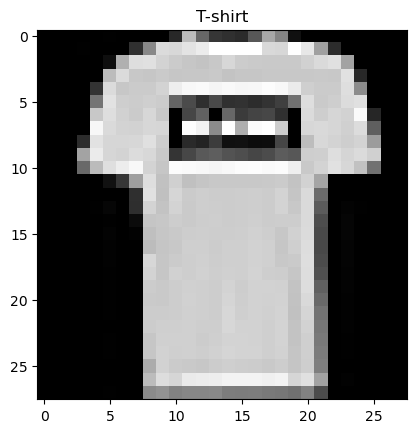

In [14]:
# Plot the second training image

image = Image.open(image_path)
plt.imshow(image, cmap = 'gray', vmin = 0, vmax = 255)
plt.title(data_name.iloc[1, 0])
plt.show()

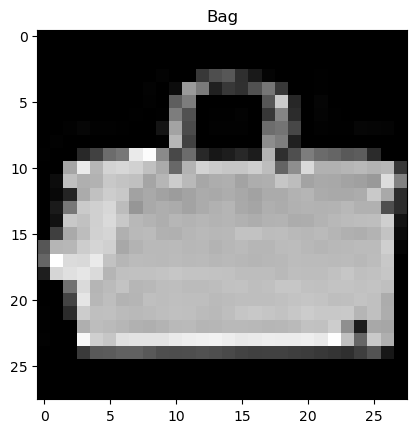

In [17]:
# Plot the 20th image

image_path = data_name.iloc[99, 1]
image = Image.open(image_path)
plt.imshow(image, cmap = 'gray', vmin = 0, vmax = 255)
plt.title(data_name.iloc[99, 0])
plt.show()

<h2 id="data_class">Create a Dataset Class</h2>


In this section, we will use the components in the last section to build a dataset class and then create an object.


In [18]:
# Create your own dataset object

class Dataset(Dataset):

    # Constructor
    def __init__(self, csv_file, data_dir, transform = None):
        
        # Image directory
        self.data_dir = data_dir
        
        # The transform is goint to be used on image
        self.transform = transform
        data_dircsv_file = os.path.join(self.data_dir, csv_file)
        # Load the CSV file contians image info
        self.data_name = pd.read_csv(data_dircsv_file)
        
        # Number of images in dataset
        self.len = self.data_name.shape[0]
    
    # Get the length
    def __len__(self):
        return self.len
    
    # Getter
    def __getitem__(self, idx):
        
        # Image file path
        img_name = os.path.join(self.data_dir, self.data_name.iloc[idx, 1])
        # Open image file
        image = Image.open(img_name)
        
        # The class label for the image
        y = self.data_name.iloc[idx, 0]
        
        # If there is any transform method, apply it onto the image
        if self.transform:
            image = self.transform(image)

        return image, y

In [19]:
# Create the dataset objects

dataset = Dataset(csv_file = csv_file, data_dir = directory)

Each sample of the image and its class y are stored in a tuple <code>dataset[sample]</code>. The image is 1st element in the tuple <code>dataset[sample][0]</code>, the label or class is the second element in the tuple <code> dataset[sample][1]</code>. 

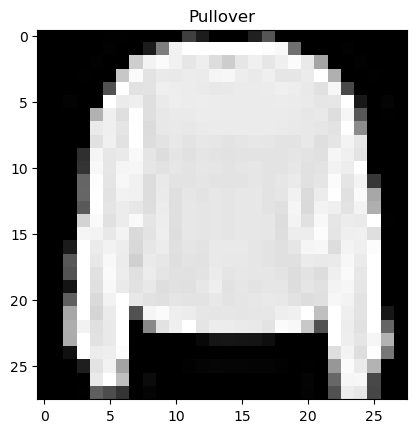

In [22]:
# Plot the first image and its class

image = dataset[7][0]
y = dataset[7][1]

plt.imshow(image, cmap = 'gray', vmin = 0, vmax = 255)
plt.title(y)
plt.show()

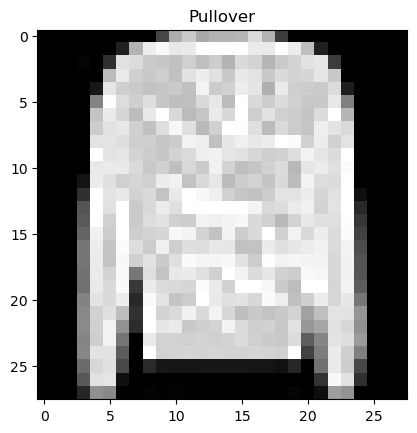

In [26]:
image = dataset[27][0]
y = dataset[27][1]

plt.imshow(image, cmap = 'gray', vmin = 0, vmax = 255)
plt.title(y)
plt.show()

<h2 id="Torchvision"> Torchvision Transforms  </h2>


In [28]:
import torchvision.transforms as transforms

We can apply some image transform functions on the dataset object. The image can be cropped and converted to a tensor. We can use <code>transform.Compose</code> to combine 2 transform functions.


In [32]:
# Combine two transforms and apply the compose to MNIST dataset

compose_crop_tensor = transforms.Compose([transforms.CenterCrop(20), transforms.ToTensor()])
dataset = Dataset(csv_file = csv_file , data_dir = directory, 
                  transform = compose_crop_tensor)
print('The shape of 1st element tensor:', dataset[0][0].shape)

The shape of 1st element tensor: torch.Size([1, 20, 20])


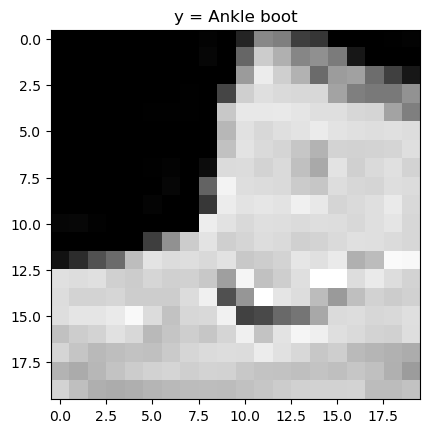

In [34]:
# Plot 1st element in dataset -- Notice we see less of the shoe.

show_data(dataset[0], shape = (20, 20))

In the below example, we Vertically flip the image, and then convert it to a tensor. Use <code>transforms.Compose()</code> to combine these two transform functions. Plot the flipped image.


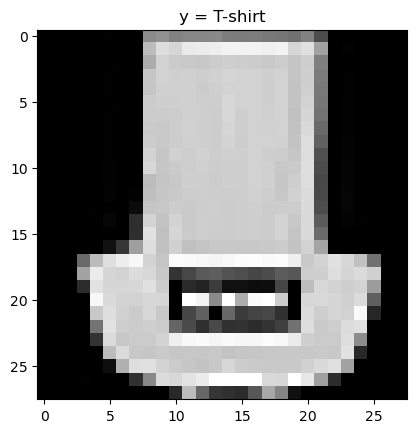

In [36]:
# Construct the compose.

compose_fliptensor = transforms.Compose([transforms.RandomVerticalFlip(p = 1),
                                         transforms.ToTensor()])
# Apply it on MNIST dataset.
dataset = Dataset(csv_file = csv_file , data_dir = directory,
                  transform = compose_fliptensor )

# Plot the image out.
show_data(dataset[1])

<h3>Practice</h3>


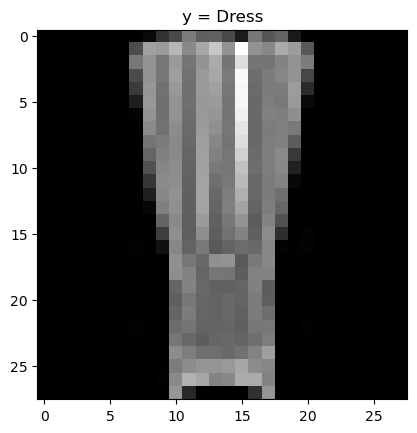

In [44]:
compose_practice = transforms.Compose([transforms.RandomVerticalFlip(p = 1), 
                                       transforms.ToTensor()])

ds_practice = Dataset(csv_file = csv_file, data_dir = directory, 
                      transform = compose_practice)
show_data(ds_practice[31])